# Processamento de imagem sem ruído

Nesta primeira etapa da presente atividade, iremos realizar a equalização do histograma da imagem determinada. Esta que é uma importante etapa de pré-processamento, se faz necessário para a otimização da imagem em análise, manipulando os valores de intensidade originais de seus pixels. 

Nos passos seguintes, realizamos a leitura da imagem utilizando a biblioteca OpenCV (4.5.4) bem como sua conversão para o formato RGB, tendo em vista que a biblioteca OpenCV utiliza por padrão o formato BGR, também utilizamos a biblioteca Matplotlib (3.4.3) plotamos a imagem e o seu histograma.

In [134]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print("Bibliotecas utilizadas:", end="\n\n")

print("OpenCV", cv2.__version__)
print("Matplotlib", matplotlib.__version__)
print("Numpy", np.__version__)

Bibliotecas utilizadas:

OpenCV 4.5.4-dev
Matplotlib 3.4.3
Numpy 1.19.5


In [135]:
imagem = cv2.imread('images/imagem_sem_ruido.jpg')                 # Carrega a imagem
print("\nDimensões da imagem:", imagem.shape)


Dimensões da imagem: (1350, 1800, 3)


Text(0.5, 1.0, 'Histograma')

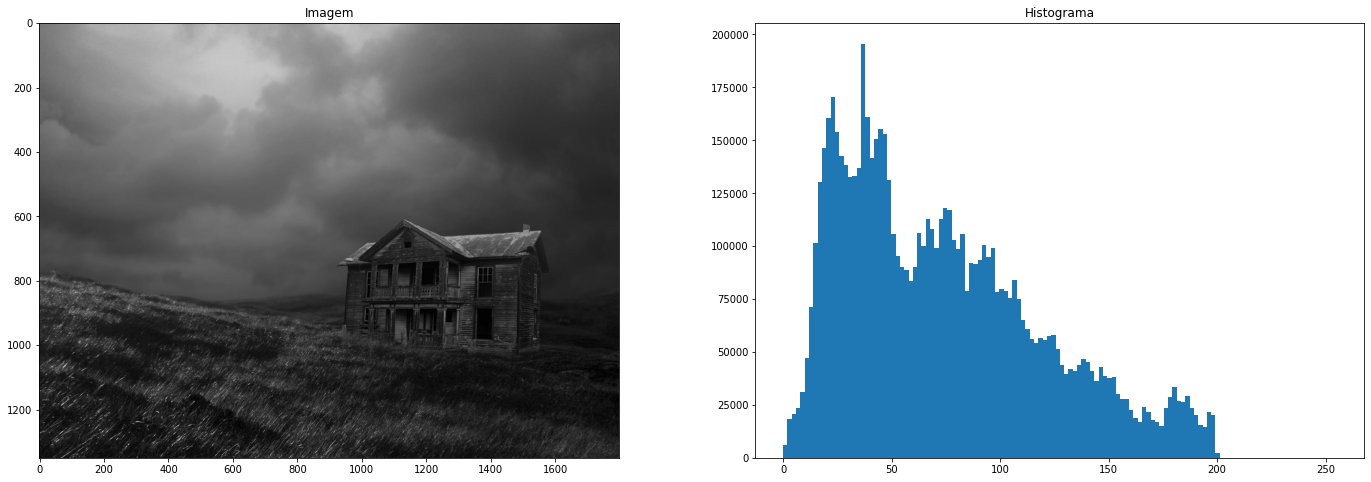

In [136]:
plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))         # Altera o formato da imagem para RGB (necessário para o matplotlib).
plt.title('Imagem')

plt.subplot(1, 2, 2)
plt.hist(imagem.flatten(), 128)                             # Transforma a imagem em um vetor (1350, 1800, 3) -> (7290000) e plota o histograma da imagem.
plt.title('Histograma')


É possivel observar em seu histograma, que os valores apresentam maior intensidade em tonalidades mais próximas de zero, com raras ocorrências de tonalidades entre as faixas de 200 a 250, consequentemente tornando a imagem mais escura e com baixo contraste.

## Equalização da Imagem

Utilizando a função equalizeHist da biblioteca OpenCV, realizamos a equalização da imagem para a obtenção de um ganho de contraste no presente objeto em análise. Em suma, esta função realiza as seguintes operações na imagem:

1. Calcula o histograma da imagem.
2. Normaliza o histograma para que a soma de seus bins seja igual a 255.
3. Calcula a integral do histograma:

$${H'_i = \sum _{0 \le j < i} H(j)}$$

4. Transforma a imagem utilizando $H'$ como uma tabela de consulta:

$$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))$$

In [137]:
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)         # Converte a imagem para escala de cinza
eq = cv2.equalizeHist(gray)                             # Equaliza o histograma da imagem utilizando a função equalizeHist do OpenCV

Text(0.5, 1.0, 'Histograma')

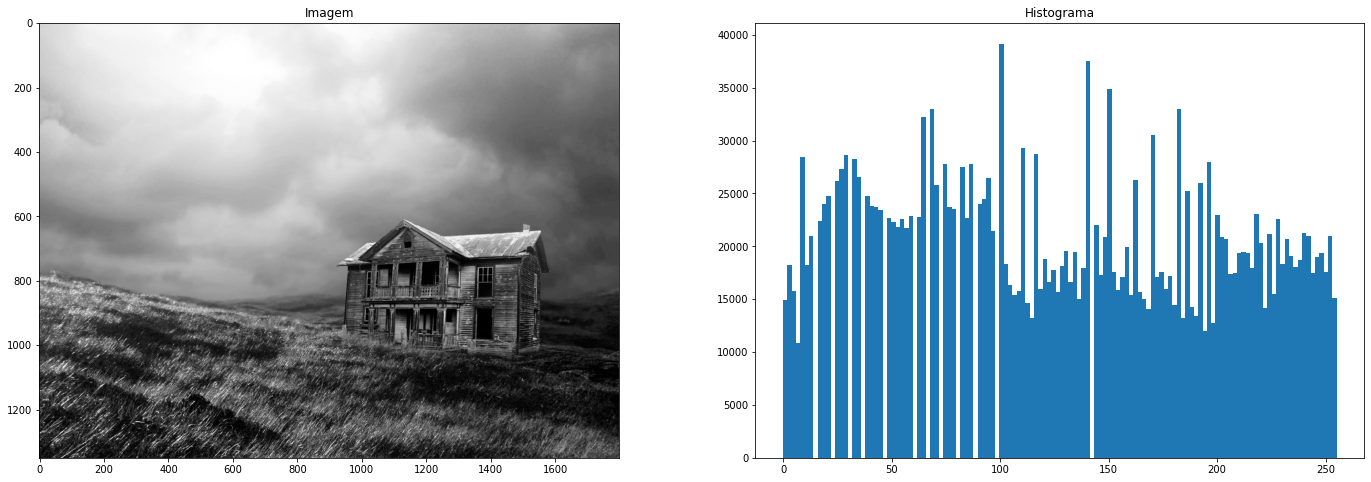

In [138]:
plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(eq, cmap='gray')
plt.title('Imagem')

plt.subplot(1, 2, 2)
plt.hist(eq.flatten(), 128)
plt.title('Histograma')

Com a aplicação da técnica descrita anteriormente, observamos que a imagem após o processamento apresenta uma distribuição mais uniforme, denotando-se valores em tonalidades nas faixas que cuja ocorrência era menor (200-250) em comparação com a imagem original.

## Comparação entre a imagem original e a imagem equalizada.

Para efeitos de comparação, realizamos os plots das duas imagens e de seus respectivos histogramas.

Text(0.5, 1.0, 'Histograma Equalizado')

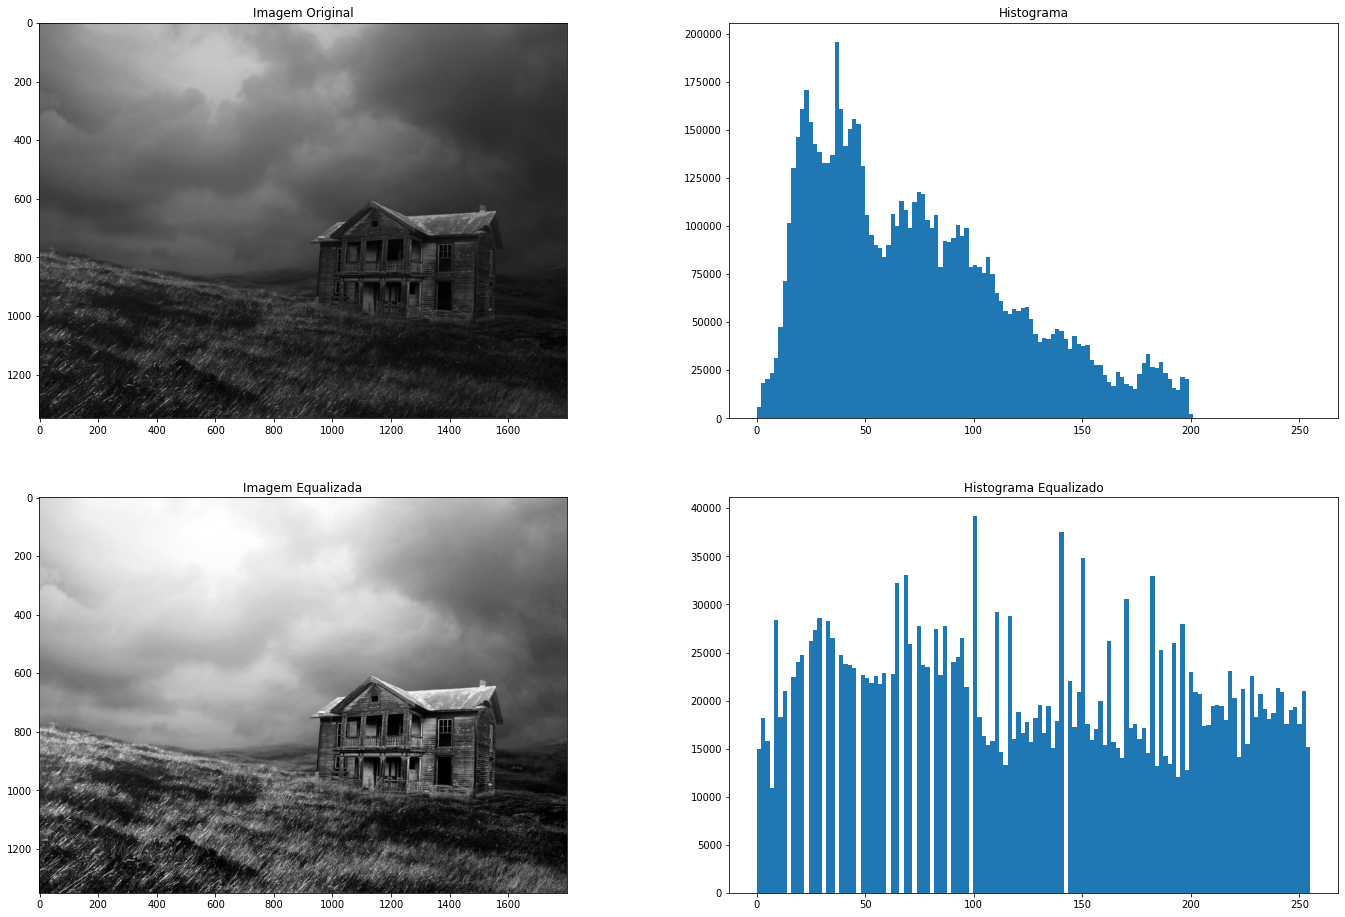

In [139]:
plt.subplots(figsize=(24, 16))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.hist(imagem.flatten(), 128)
plt.title('Histograma')

plt.subplot(2, 2, 3)
plt.imshow(eq, cmap='gray')
plt.title('Imagem Equalizada')

plt.subplot(2, 2, 4)
plt.hist(eq.flatten(), 128)
plt.title('Histograma Equalizado')


## Cálculo das Funções de Distribuição Acumuladas


Podemos utilizar o cálculo da Função de Distribuição Acumulada (Cumulative Distribution Function - CDF), para verificarmos o comportamento da distribuição da imagem em análise. Para tal, realizamos a soma acumulada dos valores presentes no vetor da imagem e posteriormente sua normalização.

In [140]:

hist_original, bins = np.histogram(imagem.flatten(), 256, [0,256])
cdf_original = hist_original.cumsum()
cdf_original_normalized = cdf_original * float(hist_original.max()) / cdf_original.max()

hist_eq, bins = np.histogram(eq.flatten(),256,[0,256])
cdf_eq = hist_eq.cumsum()
cdf_eq_normalized = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

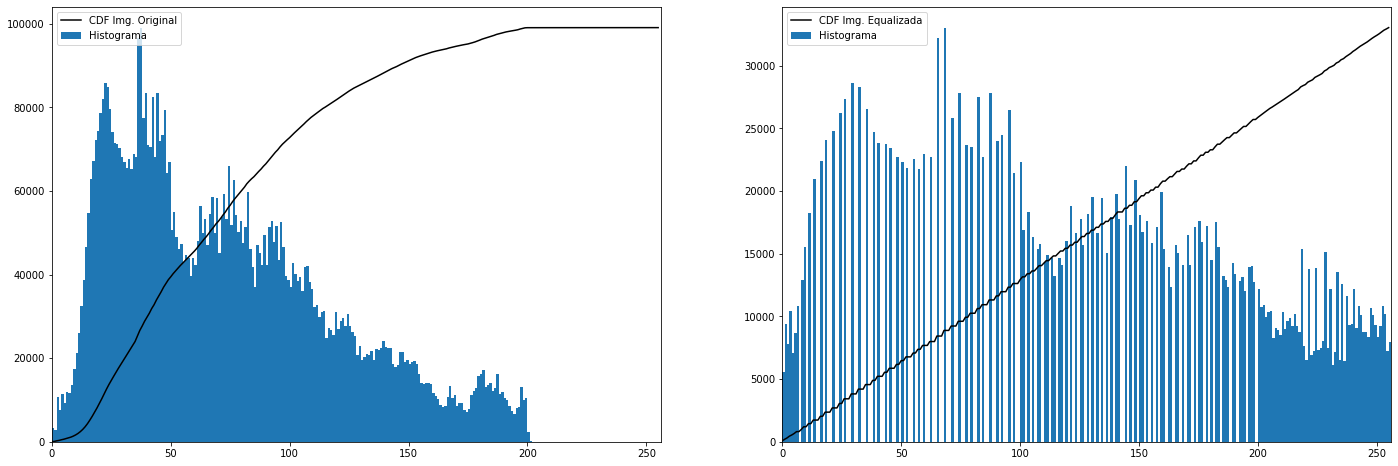

In [141]:

plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(cdf_original_normalized, color = 'k')
plt.hist(imagem.flatten(), 256, [0,256])
plt.xlim([0,256])
plt.legend(('CDF Img. Original','Histograma'), loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(cdf_eq_normalized, color = 'k')
plt.hist(eq.flatten(),256,[0,256])
plt.xlim([0,256])
plt.legend(('CDF Img. Equalizada','Histograma'), loc = 'upper left')
plt.show()

Nota-se que, o histograma da imagem equalizada demonstra que os valores de intensidade dos pixels se dispõe de forma mais uniforme, apresentando uma maior distribuição dos valores e consequentemente uma melhora no contraste da imagem, comportamento este facilmente observável por meio de sua função de distribuição acumulada com a curva de sua CDF em formato de rampa em contraste com a curva da imagem original, que apresenta uma curva de crescimento inicial maior seguida pelo comportamento de amortecimento devido a falta de valores nas faixas finais.

# Processamento de imagem com ruído.

Na segunda atividade proposta utilizamos técnicas para redução de ruídos presentes na imagem, nesta etapa, o principal objetivo é remover as ocorrências indesejadas na imagem em questão, sem prejuízo de suas caracteristicas originais e qualidade.

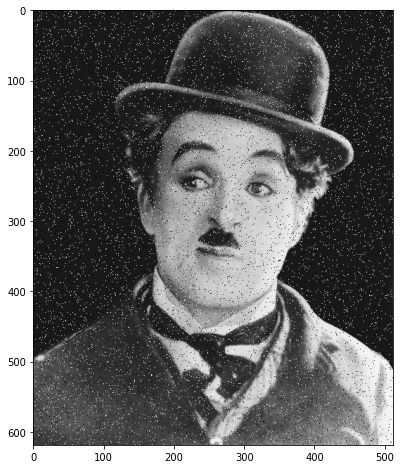

In [142]:
plt.figure(figsize=(16, 8))
noise = cv2.imread('images/imagem_ruido.png')
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))

É possivel notar com a exibição da figura acima, a ocorrência de diversos pontos de ruído indesejados em nossa imagem. Nos próximos passos, iremos aplicar filtros de suavização visando removê-los. Primeiramente foram estabelecidos alguns valores a serem imputados nos paramêtros de cada filtro gerando os plots das imagens correspondentes para avaliação da redução de ruído resultante. 

In [143]:
gaussian_params = ((1,1), (3,3), (5,5), (7,7), (9,9), (11,11))
median_params = (1, 3, 5, 7, 9, 11)

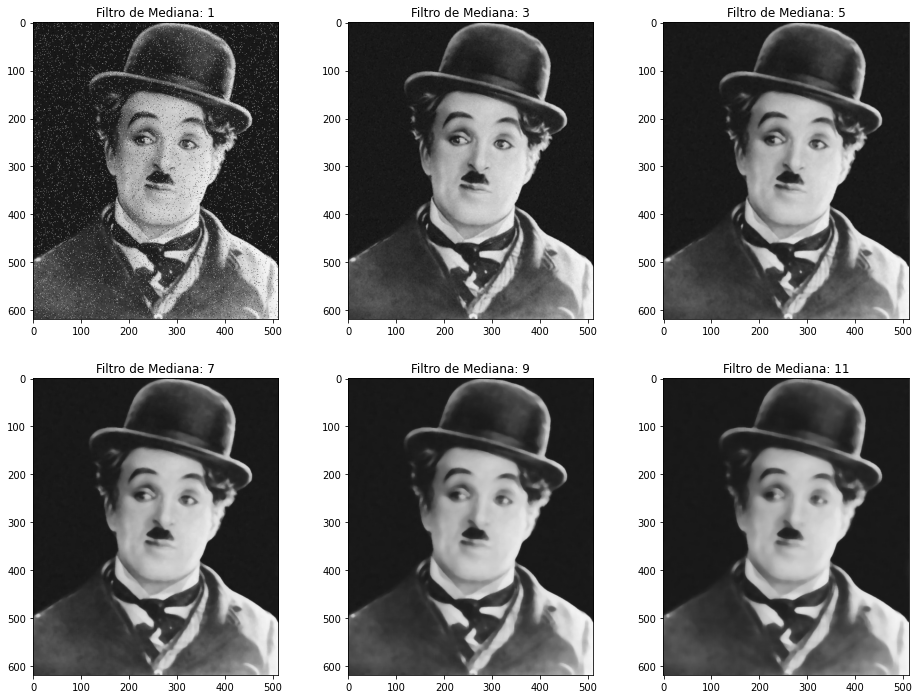

In [144]:
fig = plt.figure(figsize=(16, 12))
aux = 1

for m in median_params:
    a = fig.add_subplot(2, 3, aux)
    median = cv2.medianBlur(noise, m) 
    plt.imshow(median, cmap='gray')
    plt.title('Filtro de Mediana: ' + str(m))
    aux += 1

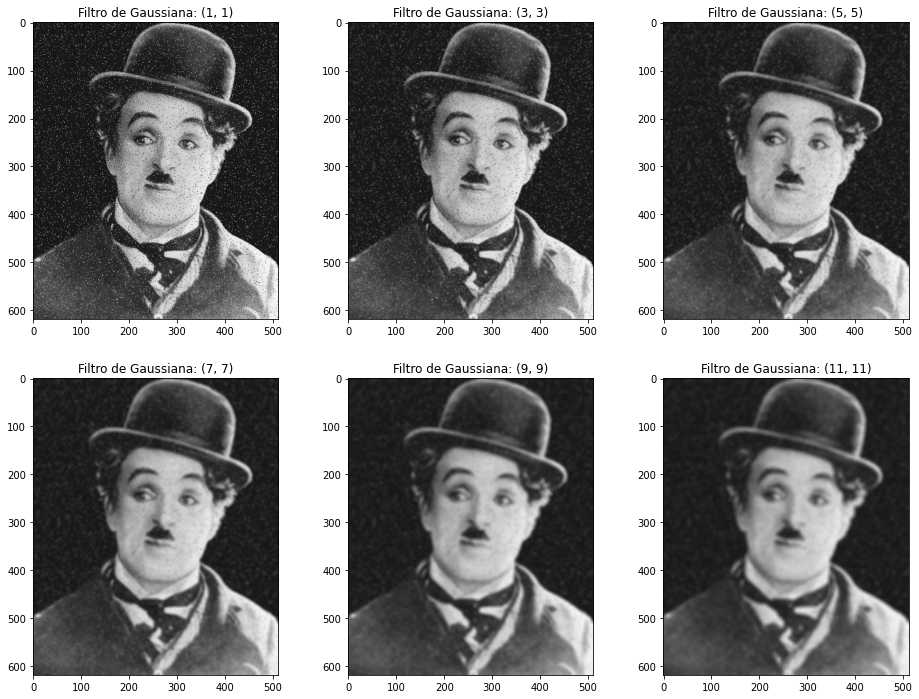

In [145]:
fig = plt.figure(figsize=(16, 12))
aux = 1

for g in gaussian_params:
    a = fig.add_subplot(2, 3, aux)
    gaussian = cv2.GaussianBlur(noise, g, 5)
    plt.imshow(gaussian, cmap='gray')
    plt.title('Filtro de Gaussiana: ' + str(g))
    aux += 1

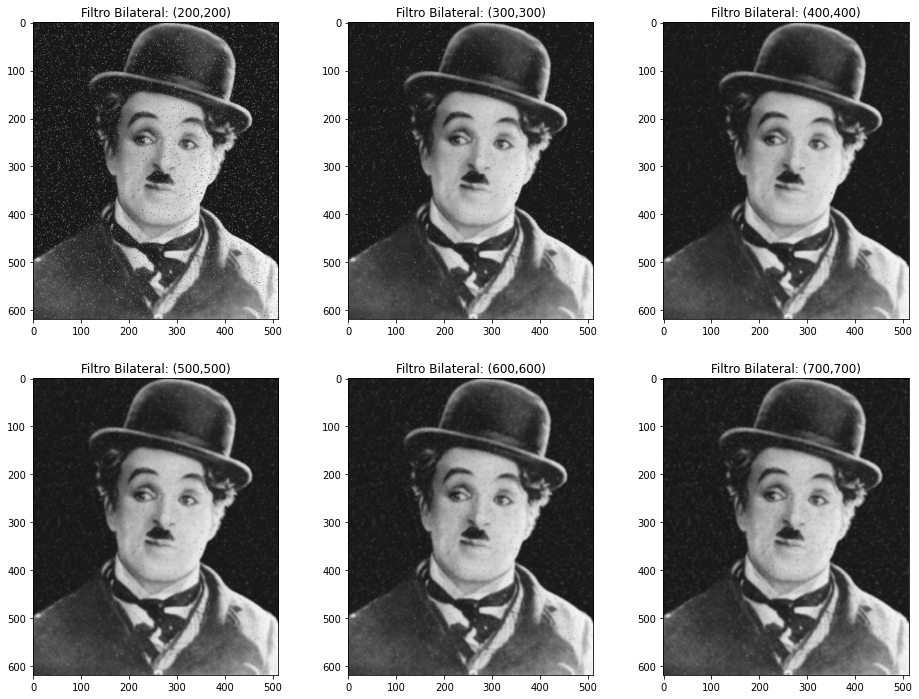

In [146]:
fig = plt.figure(figsize=(16, 12))
aux = 1
sigmaColor = 200
sigmaSpace = 200

for b in range(6):
    a = fig.add_subplot(2, 3, aux)
    bilateral = cv2.bilateralFilter(noise, 6, sigmaColor, sigmaSpace)
    plt.imshow(bilateral, cmap='gray')
    plt.title('Filtro Bilateral: ' + '(' + str(sigmaColor) + ',' + str(sigmaSpace) + ')')
    sigmaColor += 100
    sigmaSpace += 100
    aux += 1

Findada esta análise, selecionamos a melhor amostra gerada por cada tipo de filtro aplicado, baseada em dois principais fatores:

1. Extração do ruído presente na imagem original.
2. Alteração das caracteristicas do original após o processo de filtragem (Ex.: Perda de contraste, imagem excessivamente borrada etc.).

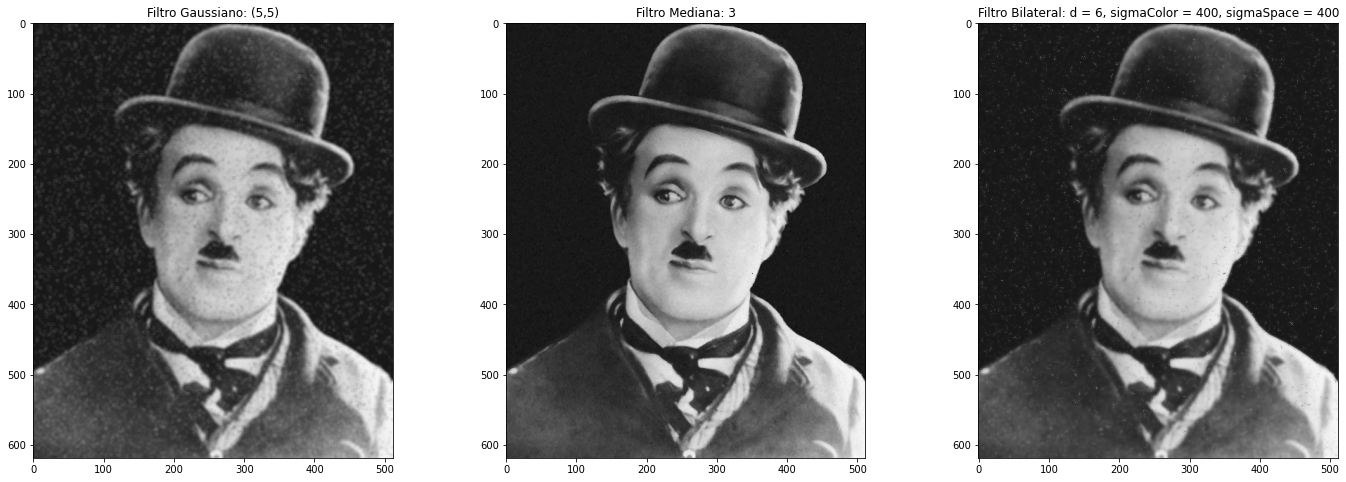

In [148]:
gaussian = cv2.GaussianBlur(noise, (5,5), 5)
median = cv2.medianBlur(noise, 3)  
bilateral = cv2.bilateralFilter(noise, 6, 400, 400)

plt.subplots(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.imshow(gaussian, cmap='gray')
plt.title('Filtro Gaussiano: (5,5)')

plt.subplot(1, 3, 2)
plt.imshow(median, cmap='gray')
plt.title('Filtro Mediana: 3')

plt.subplot(1, 3, 3)
plt.imshow(bilateral, cmap='gray')
plt.title('Filtro Bilateral: d = 6, sigmaColor = 400, sigmaSpace = 400')
plt.show()

Com o plot acima, é possivel concluir que o filtro de mediana, para esta imagem e com este nível de ruído apresentou um melhor desempenho, extraindo de forma satisfatória o sinal indesejado presente na imagem, sem prejuízos a qualidade da mesma.